In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

В этой тетрадке собраны baselines и условие задачи.

#Примеры рядов

Открываем файл с временными рядами

In [6]:
data_full_1_104 = pd.read_csv('data_full_1_104.csv')
data_full_1_104.irow(range(0,5))

,Unnamed: 0,ID,DiskSize,Creation,First,StartTime,Now,1,2,3,...,95,96,97,98,99,100,101,102,103,104
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.635799,104591,104670,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,134
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.819260,104607,104676,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,104607,104666,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.490704,104607,104740,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.289290,104607,104685,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рисуем несколько рядов

#Baselines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Открываем первй файл задачи

In [109]:
data1_53 = pd.read_csv('data1_53.csv')
data1_53.shape[0]

2840

Делим данные на обучение/тестирование

In [6]:
from sklearn.cross_validation import train_test_split
ind_train, ind_test, _, _ = train_test_split(data1_53.index, data1_53.index, test_size=0.33, random_state=42)

Подготовка данных для классификатора

In [74]:
X_train = data1_53[[str(i) for i in range(1,53)]].values[ind_train,:]
X_test = data1_53[[str(i) for i in range(1,53)]].values[ind_test,:]

y_train = data1_53['label'].values[ind_train]
y_test = data1_53['label'].values[ind_test]

In [ ]:
x = data1_10[[str(i) for i in range(1,53)]]

Обучаем классификатор

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2500, max_depth=6, subsample=0.8)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2500,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [124]:
gbc.score(X_test, y_test)

0.84008528784648184

Строим ROC кривые для обучения и теста

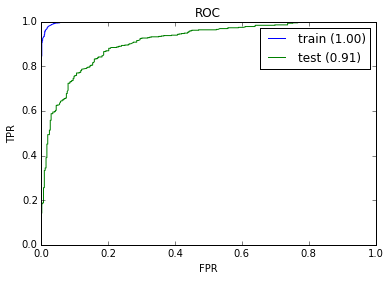

In [20]:
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, gbc.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label='train (%.2f)' % roc_auc_train)

fpr_test, tpr_test, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label='test (%.2f)' % roc_auc_test)

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

Открываем второй файл данных

In [154]:
data2_54 = pd.read_csv('data2_54.csv')
data2_54.irow(range(0,3))

,Unnamed: 0,ID,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,376,0,0,0,198,134,0,67,0,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Подготовка данных

In [9]:
X_train2 = data2_54[[str(i) for i in range(2,54)]].values[ind_train,:]
X_test2 = data2_54[[str(i) for i in range(2,54)]].values[ind_test,:]

y_train2 = data2_54['label'].values[ind_train]
y_test2 = data2_54['label'].values[ind_test]

In [32]:
def draw_roc(X_test, y_test, X_test2, y_test2, label1, label2, clf) :
    fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=label1+' (%.2f)' % roc_auc_test)

    fpr_test2, tpr_test2, _ = roc_curve(y_test2, clf.predict_proba(X_test2)[:,1])
    roc_auc_test2 = auc(fpr_test2, tpr_test2)
    plt.plot(fpr_test2, tpr_test2, label=label2+' (%.2f)' % roc_auc_test2)

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='best')
    plt.show()

In [292]:
dataframes = []
for i in xrange(1, 21, 2):
    df = data_full_1_104[[str(i) for i in range(i,i+52)]]
    df.columns = range(1, 53)
    dataframes.append(df)
    
trainset = pd.concat(dataframes)

In [293]:
ys = []
for i in xrange(1, 21, 2):
    y = (((data_full_1_104[[str(i) for i in range(52+i, 78+i)]]).sum(axis=1)>0)*1.).astype(np.float)
    ys.append(y)
    
labels = pd.concat(ys)

Используем обученный классификатор для прогноза и строим ROC кривые

In [31]:
from sklearn.metrics import roc_curve, auc

draw_roc(X_train2, y_train2, X_test, y_test, 'train2', 'test', gbc)

NameError: name 'draw_roc' is not defined

ROC кривые на двух тестовых выборках и есть baselines задачи.

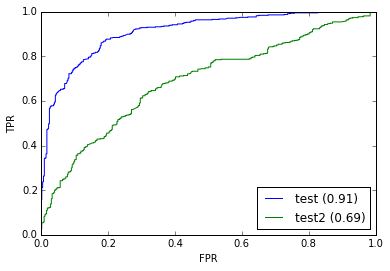

In [229]:
draw_roc(X_test, y_test, X_test2, y_test2, 'test', 'test2', gbc)

#Задача

1. Поставить ipython
2. Почитать про Restricted Boltzmann Machines (RBM) и Deep Belief Networks (DBN).
3. Выбрать и разобрать библиотеку с DBN (scikit-learn, nolearn, theanet(!?), pybrain(?)).
4. Используя DBN увеличить ROC AUC для test2.
5. Используя DBN увеличить ROC AUC для test и test2.

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [21]:
def get_auc(clf, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    return auc(fpr, tpr)

In [20]:
def add_last(data):
    data['last'] = np.zeros(data.shape[0])
    for ind, row in data.iterrows():
        count = 0
        for j in xrange(52, 0, -1):
            if row[j] > 0:           
                break
            else:
                count += 1
        data['last'][ind] = count

In [13]:
dataframes = []
for i in xrange(1, 20):
    df = data_full_1_104[[str(x) for x in range(i,i+52)]]
    df.columns = range(1, 53)
    dataframes.append(df)

trainset = pd.concat(dataframes)
trainset.reset_index(inplace=True)
trainset.drop(['index'], axis=1, inplace=True)
trainset['mean'] = trainset.iloc[:,0:52].mean(axis=1)
trainset = trainset[trainset['mean']!=0]

In [14]:
ys = []
for i in xrange(1, 20):
    y = (((data_full_1_104[[str(x) for x in range(52+i, 78+i)]]).sum(axis=1)>0)*1.).astype(np.float)
    ys.append(y)
    
labels = pd.concat(ys)
labels = pd.DataFrame(labels)
labels.reset_index(inplace=True)
labels.drop(['index'], axis=1, inplace=True)

In [79]:
def get_dataset(week_num, size):
    test_x = data_full_1_104[[str(i) for i in range(week_num,week_num+52)]]
    test_x.columns = range(1, 53)
    test_x['mean'] = test_x.iloc[:,0:52].mean(axis=1)
    test_x = test_x[test_x['mean']!=0]
    rows = np.random.choice(test_x.index.values, size)
    test_x = test_x.ix[rows]
    add_last(test_x)
    test_x['active_weeks'] = 52 - (test_x[range(1, 53)]==0).sum(axis=1) 
    test_y = (((data_full_1_104[[str(i) for i in range(week_num,week_num+52)]]).sum(axis=1)>0)*1.).astype(np.float)
    test_y = labels.ix[test_x.index]
    return test_x, test_y

In [15]:
rows = np.random.choice(trainset.index.values, 2000)
train_x = trainset.ix[rows]

In [25]:
train_y = labels.ix[train_x.index]

In [53]:
test_x, test_y = get_dataset(20, 2000)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [74]:
test2_x, test2_y = get_dataset(21, 2000)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
test3_x, test3_y = get_dataset(25, 2000)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Taking samples from different time periods

In [22]:
add_last(train_x)
train_x['active_weeks'] = 52 - (train_x[range(1, 53)]==0).sum(axis=1) 

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
_rfc = RFC(n_estimators=300)
_rfc.fit(train_x.values.astype(np.float64), train_y.values)
print get_auc(_rfc, test_x.values.astype(np.float64), test_y.values), get_auc(_rfc, test2_x.values.astype(np.float64), test2_y.values)

0.881601333333 0.914866525987


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from IPython.kernel.zmq import kernelapp as app


In [68]:
print get_auc(_rfc, test3_x.values.astype(np.float64), test3_y.values)

0.885859872611


In [82]:
res_dbn = []
res_rfc = []
for i in xrange (20, 28):
    test_x, test_y = get_dataset(i, 400)
    test_x_scaled = scale(test_x.values.astype(np.float64))
    
    res_rfc.append(get_auc(_rfc, test_x.values.astype(np.float64), test_y.values))
    res_dbn.append(get_auc(_dbn, test_x_scaled, test_y.values))

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


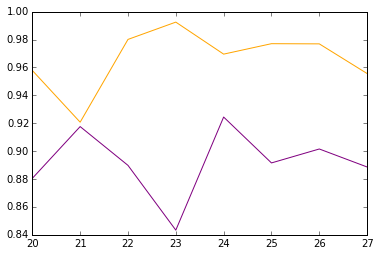

In [83]:
plt.plot(xrange (20, 28), res_rfc, 'purple')
plt.plot(xrange (20, 28), res_dbn, 'orange')
plt.show;

In [77]:
from sklearn.preprocessing import scale
train_x_scaled = scale(train_x.values.astype(np.float64))
test_x_scaled = scale(test_x.values.astype(np.float64))
test2_x_scaled = scale(test2_x.values.astype(np.float64))
test3_x_scaled = scale(test3_x.values.astype(np.float64))

In [72]:
from nolearn.dbn import DBN
_dbn = DBN([train_x.shape[1], 200, 120, 2], learn_rates = 0.1, epochs=300)
_dbn.fit(train_x_scaled, train_y.values)
print get_auc(_dbn, test_x_scaled, test_y.values)
print get_auc(_dbn, test2_x_scaled, test2_y.values)
print get_auc(_dbn, test3_x_scaled, test3_y.values)

0.952056
0.972442809142
0.943363946082


C:\Python27\lib\site-packages\scikit_learn-0.16.1-py2.7-win32.egg\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
print get_auc(_dbn, test_x_scaled, test_y.values)
print get_auc(_dbn, test2_x_scaled, test2_y.values)
print get_auc(_dbn, test3_x_scaled, test3_y.values)

0.952056
0.964505699731
0.962582950097
